# K Nearest Neighbour Classification Algorithm :

It is a supervised learning method that is used to classify the data in the dataset to be belonged to different classes. This is done in the labelled dataset  in which we have the given number of classes.
### Steps involved in the classification
1. Choose the number k of neighbours.
2. Take the k nearest neighbours of new datapoint, according to Euclidean distance.
3. Among these neighbours, count the number of data point in each category.
4. Assign the new data point to category for which you have counted the most number of data point.
5. Model is ready with the output.

##### Importing the libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

######  Importing the dataset and assingning the features

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset[['Age','EstimatedSalary']]
y = dataset['Purchased']

######  Splitting and Scaling for better results

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

######  KNN model intialisation and fitting the model
There are several parameters to think about
1. n_neighbors : int, optional (default = 5), Number of neighbors to use by default for k-neighbors() queries.
2. metric : string or callable, the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.
3. p : integer, optional (default = 2)When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

######  Predicting the test set and drawing the Confusion Matrix

In [12]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for the classifier \n",cm)

Confusion Matrix for the classifier 
 [[64  4]
 [ 3 29]]


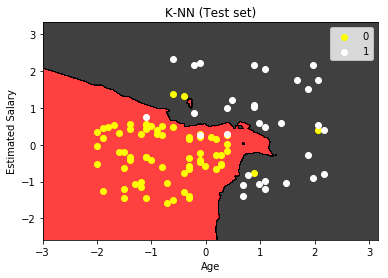

In [13]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('Yellow', 'white'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()